# Линейная регрессия: аналитическое решение #

## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline
# plt.style.use('seaborn')

In [2]:
column_names = [
    'CRIM',    # уровень преступности на душу населения по городам
    'ZN',      # доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов
    'INDUS',   # доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город
    'CHAS',    # фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае)
    'NOX',     # концентрация оксидов азота (в десятимиллионных долях)
    'RM',      # среднее количество комнат в доме
    'AGE',     # доля зданий, построенных до 1940 г. и занимаемых владельцами
    'DIS',     # взвешенные расстояния до пяти бостонских центров занятости
    'RAD',     # индекс доступности радиальных автомобильных дорог
    'TAX',     # полная ставка налога на имущество за каждые 10 000 долларов стоимости
    'PTRATIO', # соотношение учеников и учителей по городам
    'B',       # 1000 * (Bk — 0.63), где Bk — доля граждан афроамериканского происхождения по городам
    'LSTAT',   # процент населения с низким статусом
    'MEDV'     # медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак)
]
boston_data = pd.read_csv('data/housing.csv', names=column_names, header=None, sep=r'\s+')
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


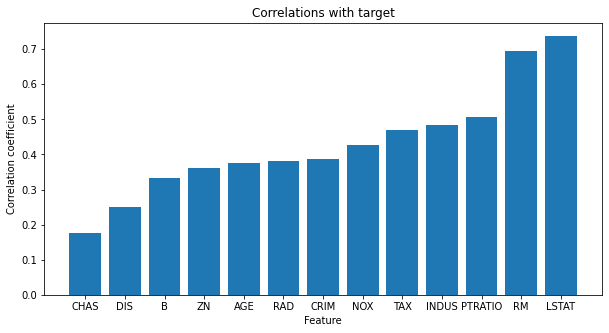

In [4]:
corr_with_target = boston_data.corr().MEDV.abs().sort_values()
corr_with_target.drop('MEDV', inplace=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(corr_with_target.index, corr_with_target.values)
ax.set_title('Correlations with target')
ax.set_xlabel('Feature')
ax.set_ylabel('Correlation coefficient');

In [5]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [6]:
def linear_regression(X, y):
    # Вектор из единиц
    ones = np.ones(X.shape[0])
    
    # Добавление вектора к таблице первым столбцом
    X = np.column_stack([ones, X])
    
    # Вычисление обратной матрицы Q
    Q = np.linalg.inv(X.T @ X)
    
    # Вектор коэффициентов
    return Q @ X.T @ y

In [7]:
w = linear_regression(X, y)
print(f'Vector w: {w}')
print(f'w0: {w[0]:.2f}')
print(f'w1: {w[1]:.2f}')

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [8]:
x_example = 5.18
y_predict = w[0] + w[1] * x_example
print(f'Predicterd price value: {float(y_predict):.2f}')

Predicterd price value: 29.63


In [9]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(X, y_true, alpha=0.7, label='Sample data')
    ax.plot(X, y_predict, color='black', label='Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor='white', fontsize=11)

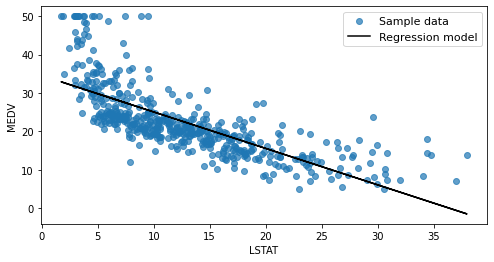

In [10]:
y_predict = w[0] + w[1] * X
plot_regression_2d(X, y, y_predict)

## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN ##

In [11]:
lr_lstat = linear_model.LinearRegression()
lr_lstat.fit(X, y)
print(f'w0: {lr_lstat.intercept_}')
print(f'w1: {lr_lstat.coef_}')

w0: 34.5538408793831
w1: [-0.95004935]


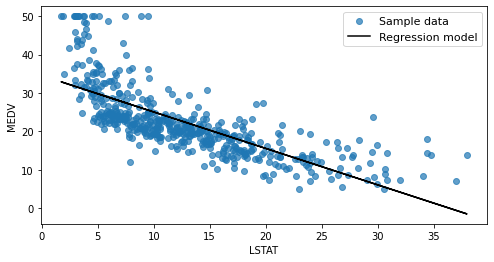

In [12]:
y_predict = lr_lstat.predict(X)
plot_regression_2d(X, y, y_predict)

### Решение для всех признаков ###

In [13]:
# Список факторов (за исключением целевого)
features = boston_data.drop(columns=['MEDV']).columns

# Составление матрицы наблюдений X и вектора ответов y
X = boston_data[features]
y = boston_data.MEDV

lr_full = linear_model.LinearRegression()

# Обучение модели - поиск параметров по МНК
lr_full.fit(X, y)

LinearRegression()

In [14]:
# Составление таблицы из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full.coef_})
# Составление строки таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full.intercept_})

coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


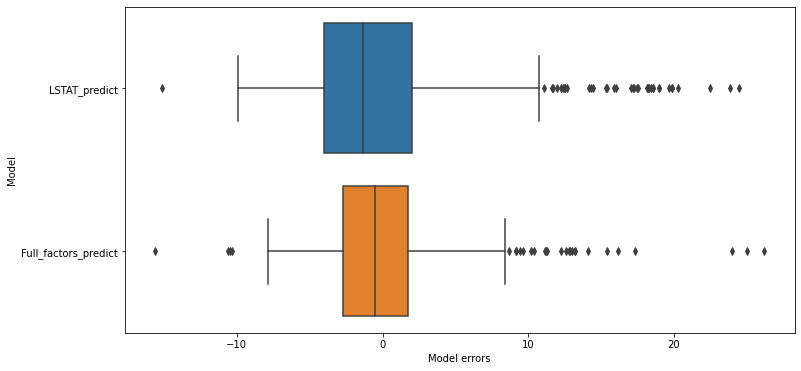

In [15]:
# Визуализация ошибки
fig, ax = plt.subplots(figsize=(12, 6))

# Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])

# Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])

# Составление DataFrame из ошибок для удобства визуализации
errors_df = pd.DataFrame({
    'LSTAT_predict': y_errors_lstat,
    'Full_factors_predict': y_errors_full
})
sns.boxplot(
    data=errors_df,
    orient='h',
    ax=ax
)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model');

###  Задание 2.7 ###

В данных появился новый участок со следующими параметрами:
```
CRIM         0.35114
ZN           0.00000
INDUS        7.38000
CHAS         0.00000
NOX          0.49300
RM           6.04100
AGE         49.90000
DIS          4.72110
RAD          5.00000
TAX        287.00000
PTRATIO     19.60000
B          396.90000
LSTAT        7.70000
```
Сделать предсказание медианной стоимости (MEDV) для данного участка c помощью модели lr_full. Результат предсказания в тысячах долларов. Ответ округлить до второго знака после точки-разделителя.

***Ответ - 22.87***

In [16]:
# display(lr_full.predict(X))
new_dict = {
    'CRIM': [0.35114],
    'ZN': [0],
    'INDUS': [7.38000],
    'CHAS': [0],
    'NOX': [0.49300],
    'RM': [6.04100],
    'AGE': [49.90000],
    'DIS': [4.72110],
    'RAD': [5],
    'TAX': [287.00000],
    'PTRATIO': [19.60000],
    'B': [396.90000],
    'LSTAT': [7.70000],
}
X_new = pd.DataFrame(new_dict)
display(X_new)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0,7.38,0,0.493,6.041,49.9,4.7211,5,287.0,19.6,396.9,7.7


In [17]:
print(round(lr_full.predict(X_new)[0], 2))

22.87


###  Задание 2.8 ###
Дан набор данных о стартапах и их прибыли (в долларах) в трёх различных штатах США.

Столбцы:

- **`R&D Spend`**&nbsp;&mdash; расходы на исследования.
- **`Administration`**&nbsp;&mdash; административные расходы.
- **`Marketing Spend`**&nbsp;&mdash; расходы на маркетинг.
- **`State*`**&nbsp;&mdash; штат.
- **`Profit`**&nbsp;&mdash; прибыль (целевой признак).

Для обучения линейной регрессии использовать `R&D Spend`, `Administration` и `Marketing Spend`. Отделить факторы от целевой переменной.

Обучить модель линейной регрессии методом наименьших квадратов с помощью библиотеки **`numpy`** (воспользоваться формулой из модуля).

Чему равны коэффициенты линейной регрессии при признаках `R&D Spend`, `Administration` и `Marketing Spend`? Ответ ввести с точностью до второго знака после точки-разделителя.

***Ответ - 0.81, -0.03, 0.03***

In [18]:
start_df = pd.read_csv('data/50_Startups.csv')
start_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [20]:
X = start_df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = start_df['Profit']
w = linear_regression(X, y)
print(f'Intercept factor: {round(w[0], 2)}')
print(f'R&D factor: {round(w[1], 2)}')
print(f'Admin factor: {round(w[2], 2)}')
print(f'Marketing factor: {round(w[3], 2)}')

Intercept factor: 50122.19
R&D factor: 0.81
Admin factor: -0.03
Marketing factor: 0.03


# Метрики регрессии. Недостатки аналитического решения #

In [21]:
y = boston_data.MEDV
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
print(f'MAE score: {metrics.mean_absolute_error(y, y_predict_lstat):.3f} k$.')
print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y, y_predict_lstat)):.3f} k$.')
print(f'MAPE score: {metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100:.3f} %')
print(f'R2 score: {metrics.r2_score(y, y_predict_lstat):.3f}')

MAE score: 4.505 k$.
RMSE score: 6.203 k$.
MAPE score: 21.352 %
R2 score: 0.544


In [22]:
y_predict_full = lr_full.predict(boston_data[features])
print(f'MAE score: {metrics.mean_absolute_error(y, y_predict_full):.3f} k$.')
print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y, y_predict_full)):.3f} k$.')
print(f'MAPE score: {metrics.mean_absolute_percentage_error(y, y_predict_full) * 100:.3f} %')
print(f'R2 score: {metrics.r2_score(y, y_predict_full):.3f}')

MAE score: 3.271 k$.
RMSE score: 4.679 k$.
MAPE score: 16.417 %
R2 score: 0.741


###  Задание 3.2 ###

Есть истинные ответы y_true = [1.23, 2.35, 2.75] и предсказания модели y_pred = [1.01, 12.3, 2.74]. Посчитать метрику RMSE, ответ округлить до двух знаков после точки-разделителя.

***Ответ - 5.75***

In [23]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]
print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y_true, y_pred)):.2f}')

RMSE score: 5.75


###  Задание 3.3 ###

Чему равен коэффициент детерминации на следующих данных?

Истинные ответы: y_true = [22.4, 20.6, 23.9, 22.0, 11.9]

Предсказанные ответы: y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

Ответ округлить до двух знаков после точки-разделителя.

***Ответ - 0.71***

In [24]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]
print(f'R2 score: {metrics.r2_score(y_true, y_pred):.2f}')

R2 score: 0.71


# Линейная регрессия: численное решение #

In [25]:
X = boston_data[['LSTAT']]
y = boston_data.MEDV

In [26]:
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

In [27]:
print(f'w0: {sgd_lr_lstat.intercept_}')
print(f'w1: {sgd_lr_lstat.coef_}')

w0: [34.33010969]
w1: [-0.96193242]


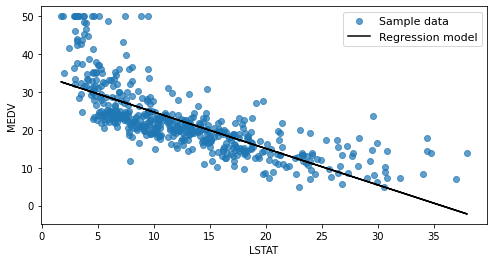

In [28]:
y_predict = sgd_lr_lstat.predict(X)
plot_regression_2d(X, y, y_predict)

In [29]:
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: 0.542


### Решение для всех признаков (без стандартизации) ###

In [30]:
X = boston_data[features]
y = boston_data.MEDV
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
sgd_lr_full.fit(X, y)

w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,1.540729e+11
1,ZN,-5.382789e+08
2,INDUS,3.091632e+11
3,CHAS,1.485638e+10
4,NOX,2.393660e+10
5,RM,1.134434e+10
6,AGE,9.343666e+10
7,DIS,-1.241329e+11
8,RAD,2.584134e+11
9,TAX,-3.359744e+11


In [31]:
y_predict = sgd_lr_full.predict(X)
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: -155407065857466568600977408.000


### Решение для всех признаков (после стандартизации) ###

In [32]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [33]:
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
sgd_lr_full.fit(X_scaled, y)

w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [34]:
y_predict = sgd_lr_full.predict(X_scaled)
print(f'R2 score: {metrics.r2_score(y, y_predict):.3f}')

R2 score: 0.740


**Попытка сделать предсказание с помощью построенной модели, передав в качестве матрицы наблюдений нестандартизованную таблицу, то ошибки мы не получим, однако значение метрики будет неадекватным:**

In [35]:
y_false = sgd_lr_full.predict(X)
print(f'R2 score: {metrics.r2_score(y, y_false):.3f}')

R2 score: -1856.503


**Что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1:**

In [36]:
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant',
    eta0=0.1,
    random_state=42
)
sgd_lr_bad.fit(X_scaled, y)
y_predict_bad = sgd_lr_bad.predict(X_scaled)
print(f'R2 score: {metrics.r2_score(y, y_predict_bad):.3f}')

R2 score: -335415038359.635


**Что будет, если поставить слишком маленькое значение параметра `eta0`? Например, 0.000001:**

In [37]:
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant',
    eta0=0.000001,
    random_state=42
)
sgd_lr_bad2.fit(X_scaled, y)
y_predict_bad2 = sgd_lr_bad2.predict(X_scaled)
print(f'R2 score: {metrics.r2_score(y, y_predict_bad2):.3f}')

R2 score: -1.578


C:\Programs\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


###  Задание 4.9 ###

Найдите в документации параметр `tol`, отвечающий на критерий остановки (по умолчанию он равен 0.001).

Обучить `SGDRegressor` на датасете о домах в Бостоне с параметром остановки, равным 0.1, и `random_state`=42. Остальные параметры оставить по умолчанию.

Рассчитать коэффициент детерминации $R^2$. Ответ округлить до третьего знака после точки-разделителя.

***Ответ - 0.735***

In [38]:
sgd_lr_tol = linear_model.SGDRegressor(tol=0.1, random_state=42)
sgd_lr_tol.fit(X_scaled, y)
y_predict_tol = sgd_lr_tol.predict(X_scaled)
print(f'R2 score: {metrics.r2_score(y, y_predict_tol):.3f}')

R2 score: 0.735


# Дилемма смещения и разброса. Полиномиальные признаки. Регуляризация #

### Разделение выборки на тренировочную (обучающую) и тестовую ###

In [39]:
X = boston_data[features]
y = boston_data.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


In [40]:
# Обучение
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказания
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

print(f'Train R2 score: {metrics.r2_score(y_train, y_train_predict):.3f}')
print(f'Test R2 score: {metrics.r2_score(y_test, y_test_predict):.3f}')

Train R2 score: 0.743
Test R2 score: 0.722


# ПОЛИНОМИАЛЬНЫЕ ПРИЗНАКИ #

In [41]:
# Генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('Train:', X_train_poly.shape)
print(type(X_train_poly))
print('Test:', X_test_poly.shape)
print(type(X_test_poly))

Train: (354, 104)
<class 'numpy.ndarray'>
Test: (152, 104)
<class 'numpy.ndarray'>


**Но если скормить эти данные модели линейной регрессии, чтобы найти коэффициенты полинома по МНК-алгоритму, то получим жуткое переобучение:**

In [42]:
lr_model_poly = linear_model.LinearRegression()
lr_model_poly.fit(X_train_poly, y_train)
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
print(f'Train R2 score: {metrics.r2_score(y_train, y_train_predict_poly):.3f}')
print(f'Test R2 score: {metrics.r2_score(y_test, y_test_predict_poly):.3f}')

Train R2 score: 0.929
Test R2 score: 0.268


# РЕГУЛЯРИЗАЦИЯ #

In [43]:
scaler = preprocessing.StandardScaler()
# Подгонка параметров стандартизатора (вычисление среднего и MSE)
scaler.fit(X_train)

# Стандартизация выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
# Генерация полиномиальных признаков для выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train:', X_train_scaled_poly.shape)
print('Test:', X_test_scaled_poly.shape)

Train: (354, 104)
Test: (152, 104)


### Построение модели линейной регрессии с L1-регуляризацией на сгенерированных ранее полиномиальных признаках ###

In [44]:
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
print(f'Train R2 score: {metrics.r2_score(y_train, y_train_predict_poly):.3f}')
print(f'Test R2 score: {metrics.r2_score(y_test, y_test_predict_poly):.3f}')

Train R2 score: 0.879
Test R2 score: 0.882


**Метрика ощутимо выросла на тестовой выборке (ранее она была равна 0,268). Получилось преодолеть переобучение.**

In [45]:
print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


### Обучение модели линейной регрессии с L2-регуляризацией на тех же данных ###

In [46]:
ridge_lr_poly = linear_model.Ridge(alpha=10)
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
print(f'Train R2 score: {metrics.r2_score(y_train, y_train_predict_poly):.3f}')
print(f'Test R2 score: {metrics.r2_score(y_test, y_test_predict_poly):.3f}')

Train R2 score: 0.907
Test R2 score: 0.848


In [47]:
print(np.round(ridge_lr_poly.coef_, 3))

[ 0.128 -0.049  0.084  0.117 -0.932  2.848 -1.008 -1.464  0.909 -0.908
 -0.653  0.971 -2.605  0.085 -0.032  0.466  2.721 -0.507  0.986  0.309
 -0.391 -0.714  0.376 -0.379  0.072  0.287  0.143 -0.138 -0.014  0.315
  0.05  -0.409 -0.316  0.075  0.702  0.08  -0.281 -0.37   0.511  0.175
  0.72   0.282  0.477  0.888 -0.012  0.074 -0.052  0.166 -0.263  0.414
 -1.129 -0.852  0.273  0.227 -0.106  0.368 -0.137 -0.241 -0.697 -0.177
 -0.326 -0.524  0.882 -0.637  0.344 -0.439 -0.006  0.386  0.233 -0.535
  0.111 -0.802 -0.662 -0.56   0.22  -1.001  0.123  0.144  0.889 -0.114
 -0.086 -1.022 -0.71   1.08  -0.446 -0.178 -0.07  -0.496  0.874 -0.926
  0.717  0.601 -0.49  -0.723  0.308  1.086 -0.448 -1.256  0.057  0.354
 -0.059 -0.433 -0.791  0.177]


**Видно, что L2-регуляризация не обнуляет коэффициенты&nbsp;&mdash; она использует для предсказания все признаки.**

### Перебор параметров модели для нахождения лучшего значения ###

In [48]:
alpha_list = np.linspace(0.001, 1, 20)
train_scores = []
test_scores = []
for alpha in alpha_list:
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))
print('Done')

Done


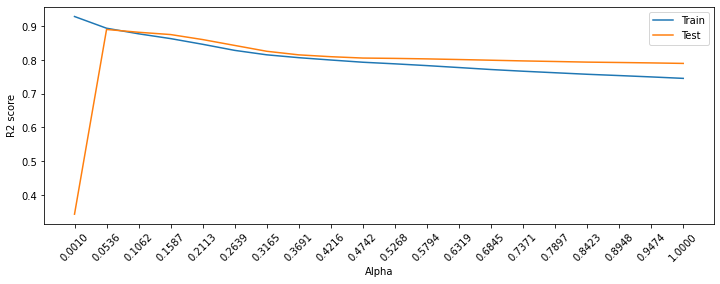

In [49]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(alpha_list, train_scores, label='Train')
ax.plot(alpha_list, test_scores, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R2 score')
ax.set_xticks(alpha_list)
ax.xaxis.set_tick_params(rotation=45)
ax.legend();

In [50]:
lasso_lr_poly = linear_model.Lasso(alpha=0.0536)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
print(f'Train R2 score: {metrics.r2_score(y_train, y_train_predict_poly):.3f}')
print(f'Test R2 score: {metrics.r2_score(y_test, y_test_predict_poly):.3f}')

Train R2 score: 0.894
Test R2 score: 0.890


# Практика по линейной регрессии с популярным датасетом Medical Cost Personal Datasets #

In [52]:
data_df = pd.read_csv('data/insurance.csv')
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- **age**&nbsp;&mdash; возраст основного бенефициара;
- **sex**&nbsp;&mdash; пол страхового подрядчика;
- **bmi**&nbsp;&mdash; индекс массы тела (кгм), в идеале — от 18.5 до 24.9;
- **children**&nbsp;&mdash; количество детей, охваченных медицинской страховкой;
- **smoker**&nbsp;&mdash; является ли человек курящим;
- **region**&nbsp;&mdash; жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
- **charges (целевой признак)**&nbsp;&mdash; индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.


In [53]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
copy_df = data_df.copy()

In [55]:
copy_df.smoker = copy_df.smoker.apply(lambda x: 0 if x == 'no' else 1)
copy_df.sex = copy_df.sex.apply(lambda x: 0 if x == 'female' else 1)
copy_df = pd.get_dummies(copy_df)
copy_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [56]:
copy_df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


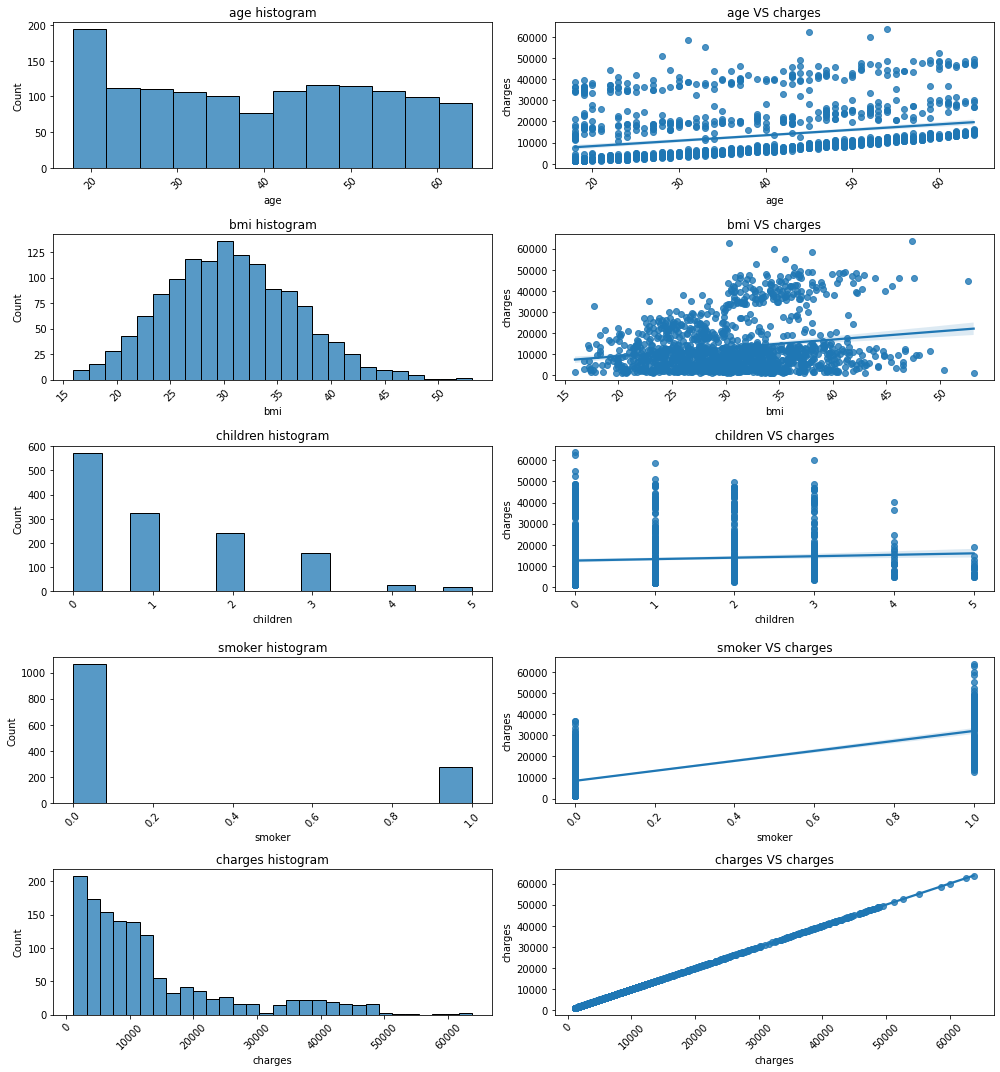

In [63]:
features_list = ['age', 'bmi', 'children', 'smoker', 'charges']
n = len(features_list)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(14, 3*n))
for m_, feature in enumerate(features_list):
    hplot = sns.histplot(
        data=copy_df,
        x=feature,
        ax=axes[m_][0]
    )
    hplot.set_title(f'{feature} histogram')
    hplot.xaxis.set_tick_params(rotation=45)
    rplot = sns.regplot(
        data=copy_df,
        x=feature,
        y='charges',
        ax=axes[m_][1]
    )
    rplot.set_title(f'{feature} VS charges')
    rplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout();

<AxesSubplot: >

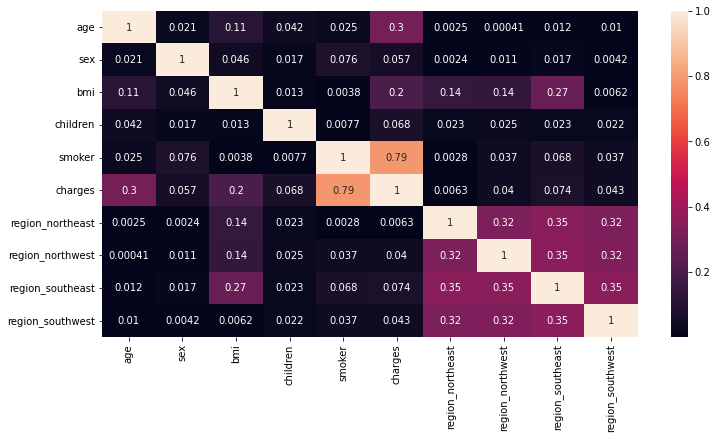

In [64]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(copy_df.corr().abs(), annot=True)

In [65]:
features = copy_df.drop(columns='charges').columns
X, y = copy_df[features], copy_df.charges

###  Задание 6.1 ###

Разделить набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользоваться функцией `train_test_split`. В качестве значения параметра `random_state` указать число 42.

Чему равно количество наблюдений в тестовом наборе данных?

***Ответ - 268***

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1070, 9) (1070,)
Test set: (268, 9) (268,)


###  Задание 6.2 ###

Обучить модель линейной регрессии аналитическим методом (`LinearRegression`) на тренировочном наборе данных. Все параметры оставить по умолчанию.

Чему равен свободный член (`intercept`) обученной модели? Ответ округлить до сотых.

***Ответ - -12390.80***

In [67]:
lr_charges = linear_model.LinearRegression()
lr_charges.fit(X_train, y_train)
print(f'w0: {lr_charges.intercept_:.2f}')
print(f'w1: {lr_charges.coef_}')

w0: -12390.80
w1: [ 2.56975706e+02 -1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]


###  Задание 6.3 ###

С помощью модели, полученной в предыдущем задании, сделать предсказание на тренировочной и тестовой выборке. Рассчитать следующие три метрики: $R^2$, $MAE$, $MAPE$. Не забыть привести значение $MAPE$ к процентам.

Значение $R^2$ округлить до трёх знаков после точки-разделителя, а значения $MAE$ и $MAPE$&nbsp;&mdash; до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?

***Train: $R^2$=0.742, MAE=4208, MAPE=42***

***Test: $R^2$=0.784, MAE=4181, MAPE=47***

In [68]:
y_train_predict = lr_charges.predict(X_train)
y_test_predict = lr_charges.predict(X_test)

print(f'Train R2 score: {metrics.r2_score(y_train, y_train_predict):.3f}')
print(f'Train MAE: {round(metrics.mean_absolute_error(y_train, y_train_predict))}')
print(f'Train MAPE: {round(metrics.mean_absolute_percentage_error(y_train, y_train_predict) * 100)}')
                    
print(f'Test R2 score: {metrics.r2_score(y_test, y_test_predict):.3f}')
print(f'Test MAE: {round(metrics.mean_absolute_error(y_test, y_test_predict))}')
print(f'Test MAPE: {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict) * 100)}')

Train R2 score: 0.742
Train MAE: 4208
Train MAPE: 42
Test R2 score: 0.784
Test MAE: 4181
Test MAPE: 47


### Задание 6.4 ###

Построить диаграмму **boxplot** для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки взять разницу между истинным ответом и предсказанием: (без модуля).

Выбрать верные ответы:
- **(False)** Разброс ошибок на тестовой выборке больше, чем на тренировочной.
- **(True)** Разброс ошибок на тренировочной выборке больше, чем на тестовой.
- **(True)** Медианная ошибка на тренировочной и тестовой выборках отрицательная (меньше 0).
- **(False)** Медианная ошибка на тренировочной и тестовой выборках положительная (больше 0)

In [69]:
y_errors_train = y_train - lr_charges.predict(X_train)
y_errors_test = y_test - lr_charges.predict(X_test)

In [70]:
errors_df = pd.DataFrame({'Train': y_errors_train, 'Test': y_errors_test})

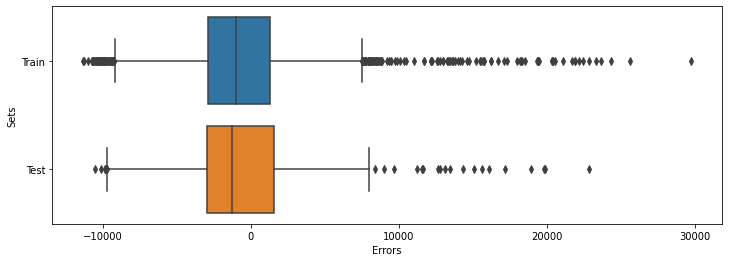

In [71]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    data=errors_df,
    orient='h',
    ax=ax
)
ax.set_xlabel('Errors')
ax.set_ylabel('Sets');

### Задание 6.5 ###

Нормализовать тренировочную и тестовую выборки с помощью min-max-нормализации (`MinMaxScaler`). Расчёт параметров нормализации (`fit`) произвести на тренировочной выборке.

***Примечание***    
Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерировать полиномиальные признаки степени 2. Воспользоваться классом `PolynomialFeatures` из библиотеки `sklearn`. Значение параметра `include_bias` выставить на `False`.

Чему равно результирующее количество столбцов?

***Ответ - 54***

In [72]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
##### X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)

X_test_scaled = scaler.transform(X_test)
##### X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

In [73]:
polyn = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
polyn.fit(X_train_scaled)
X_train_polyn = polyn.transform(X_train_scaled)
X_test_polyn = polyn.transform(X_test_scaled)
print('Train:', X_train_polyn.shape)
print('Test:', X_test_polyn.shape)

Train: (1070, 54)
Test: (268, 54)


###  Задание 6.6 ###

Обучить модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики $R^2$ на тестовой выборке? Значение $R^2$ округлить до трёх знаков после запятой.

***Ответ - 0.867***

In [74]:
model_polyn = linear_model.LinearRegression()
model_polyn.fit(X_train_polyn, y_train)
y_train_predict_polyn = model_polyn.predict(X_train_polyn)
y_test_predict_polyn = model_polyn.predict(X_test_polyn)
print(f'Train R2 score: {metrics.r2_score(y_train, y_train_predict_polyn):.3f}')
print(f'Test R2 score: {metrics.r2_score(y_test, y_test_predict_polyn):.3f}')

Train R2 score: 0.842
Test R2 score: 0.867


###  Задание 6.7 ###

Вывести значения коэффициентов полученной модели. Обратить внимание на степени коэффициентов.

***Ответ - Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация.***

In [75]:
print(model_polyn.coef_)

[-1.72324070e+16  1.31146740e+16 -6.07518911e+15  8.68217520e+15
 -1.01570042e+16 -4.74066016e+16 -1.33580061e+17 -3.47106940e+16
 -7.38096689e+16  8.49200000e+03  9.57500000e+02  8.39000000e+02
 -1.59100000e+03  2.57000000e+02  1.72324070e+16  1.72324070e+16
  1.72324070e+16  1.72324070e+16  9.88117370e+16  6.96625000e+02
 -1.26931250e+03  1.87062500e+02 -1.11926411e+17 -1.11926411e+17
 -1.11926411e+17 -1.11926411e+17 -9.46000000e+03  1.75123438e+03
  5.47712109e+04  6.07518911e+15  6.07518911e+15  6.07518911e+15
  6.07518911e+15 -1.95200000e+03 -2.24800000e+03 -8.68217520e+15
 -8.68217520e+15 -8.68217520e+15 -8.68217520e+15  4.62270002e+15
  5.53430414e+15  5.53430414e+15  5.53430414e+15  5.53430414e+15
 -3.72415148e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.89319446e+16  0.00000000e+00  0.00000000e+00 -4.99374223e+16
  0.00000000e+00 -1.08384475e+16]


###  Задание 6.8 ###

Построить линейную регрессию с L1-регуляризацией (`Lasso`) на полиномиальных признаках. В качестве параметра `alpha` использовать значение по умолчанию, параметр `max_iter` установить в значение 2000.

Чему равны метрики $R^2$, $MAE$ и $MAPE$ на тестовой выборке? Значение $R^2$ округлить до трёх знаков после запятой, а значения $MAE$ и $MAPE$ до целого числа.

***Ответ - $R^2$=0.867, MAE=2719, MAPE=30***

In [76]:
l1_polyn = linear_model.Lasso(max_iter=2000)
l1_polyn.fit(X_train_polyn, y_train)

y_train_polyn_predict = l1_polyn.predict(X_train_polyn)
y_test_polyn_predict = l1_polyn.predict(X_test_polyn)

print(f'Train R2 score: {metrics.r2_score(y_train, y_train_polyn_predict):.3f}')
print(f'Train MAE: {round(metrics.mean_absolute_error(y_train, y_train_polyn_predict))}')
print(f'Train MAPE: {round(metrics.mean_absolute_percentage_error(y_train, y_train_polyn_predict) * 100)}')

print(f'Test R2 score: {metrics.r2_score(y_test, y_test_polyn_predict):.3f}')
print(f'Test MAE: {round(metrics.mean_absolute_error(y_test, y_test_polyn_predict))}')
print(f'Test MAPE: {round(metrics.mean_absolute_percentage_error(y_test, y_test_polyn_predict) * 100)}')

Train R2 score: 0.842
Train MAE: 2890
Train MAPE: 29
Test R2 score: 0.867
Test MAE: 2719
Test MAPE: 30


In [77]:
print(np.round(l1_polyn.coef_))

[ 3.2420e+03 -4.9200e+02  5.0760e+03  4.5840e+03  1.9790e+03  1.8800e+02
 -4.7100e+02  5.8400e+02 -2.4400e+02  8.2980e+03  7.7500e+02  8.4400e+02
 -1.2080e+03  1.3500e+02 -1.0430e+03 -0.0000e+00  1.1700e+03  1.6180e+03
 -0.0000e+00  5.0600e+02 -1.1340e+03  2.6600e+02 -1.2220e+03  0.0000e+00
  2.3600e+02 -5.8000e+02 -8.1800e+03  1.2950e+03  5.4715e+04  3.5850e+03
  2.4070e+03 -9.6400e+02  0.0000e+00 -1.6750e+03 -2.0540e+03  1.9420e+03
  1.9540e+03 -0.0000e+00 -1.0640e+03  8.0000e+00  5.9400e+02 -0.0000e+00
 -2.3100e+02  1.9790e+03  6.3200e+02  0.0000e+00  0.0000e+00  0.0000e+00
 -0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00 -1.0000e+00]


###  Задание 6.9 ##

Построить линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра `alpha` использовать значение по умолчанию.

Чему равны метрики $R^2$, $MAE$ и $MAPE$ на тестовой выборке? Значение $R^2$ округлить до трёх знаков после запятой, а значения $MAE$ и $MAPE$ до целого числа.

***Ответ - $R^2$=0.863, MAE=2861, MAPE=31***

In [78]:
l2_polyn = linear_model.Ridge()
l2_polyn.fit(X_train_polyn, y_train)

y_train_polyn_predict = l2_polyn.predict(X_train_polyn)
y_test_polyn_predict = l2_polyn.predict(X_test_polyn)

print(f'Train R2 score: {metrics.r2_score(y_train, y_train_polyn_predict):.3f}')
print(f'Train MAE: {round(metrics.mean_absolute_error(y_train, y_train_polyn_predict))}')
print(f'Train MAPE: {round(metrics.mean_absolute_percentage_error(y_train, y_train_polyn_predict) * 100)}')

print(f'Test R2 score: {metrics.r2_score(y_test, y_test_polyn_predict):.3f}')
print(f'Test MAE: {round(metrics.mean_absolute_error(y_test, y_test_polyn_predict))}')
print(f'Test MAPE: {round(metrics.mean_absolute_percentage_error(y_test, y_test_polyn_predict) * 100)}')

Train R2 score: 0.839
Train MAE: 2949
Train MAPE: 30
Test R2 score: 0.863
Test MAE: 2861
Test MAPE: 31
